In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np  
import csv 
import datetime as dt

In [6]:
zillow_11 = pd.read_csv('./Resources/Zip_zhvi_bdrmcnt_1_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv')
zillow_11.head(10)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1/31/1996,...,9/30/2019,10/31/2019,11/30/2019,12/31/2019,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,6/30/2020
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,111258.0,...,717134,715191,712496,710656,709822,710312,711858,712502,712505,713185
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,111421.0,...,223303,222841,222420,222206,222280,222748,223201,223501,223454,223662
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,189781.0,...,825711,822467,819524,817030,816480,814888,813952,811516,810034,810253
3,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,128112.0,...,256844,256048,255162,254278,253906,254028,254544,255105,255632,256315
4,91940,5,77449,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,90479.0,...,143300,144023,143852,144365,144387,144938,145457,146069,146871,147265
5,61616,6,10002,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,NaN,...,692782,691368,688776,690527,694984,702318,707589,711584,713094,714139
6,91733,7,77084,Zip,TX,TX,Houston,Houston-The Woodlands-Sugar Land,Harris County,NaN,...,76696,77010,77095,77513,77262,76828,76468,76502,76568,75959
7,93144,8,79936,Zip,TX,TX,El Paso,El Paso,El Paso County,74403.0,...,130489,130350,130363,130786,131182,131502,131483,131478,131148,130523
8,84640,9,60640,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,62131.0,...,155396,155710,155849,155980,156448,157303,157645,157386,156891,156711
9,62037,10,11226,Zip,NY,NY,New York,New York-Newark-Jersey City,Kings County,151024.0,...,479406,478138,477714,475884,474922,473793,474260,475278,475370,476007


In [7]:
df_1bdr=pd.melt(zillow_11,id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'City','Metro', 'CountyName']) 
df_1bdr.head(10)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,variable,value
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,1/31/1996,111258.0
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,1/31/1996,111421.0
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,1/31/1996,189781.0
3,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,1/31/1996,128112.0
4,91940,5,77449,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,1/31/1996,90479.0
5,61616,6,10002,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,1/31/1996,NaN
6,91733,7,77084,Zip,TX,TX,Houston,Houston-The Woodlands-Sugar Land,Harris County,1/31/1996,NaN
7,93144,8,79936,Zip,TX,TX,El Paso,El Paso,El Paso County,1/31/1996,74403.0
8,84640,9,60640,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,1/31/1996,62131.0
9,62037,10,11226,Zip,NY,NY,New York,New York-Newark-Jersey City,Kings County,1/31/1996,151024.0


In [8]:
df_1bdr["type"]="1-bdr"
df_1bdr["variable"]=df_1bdr["variable"].astype('datetime64[m]')
df_1bdr["epoch"] = (df_1bdr["variable"] - dt.datetime(1970,1,1)).dt.total_seconds()
df_1bdr=df_1bdr.dropna(how="any")
df_1bdr

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,variable,value,type,epoch
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,1996-01-31,111258.0,1-bdr,8.230464e+08
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,1996-01-31,111421.0,1-bdr,8.230464e+08
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,1996-01-31,189781.0,1-bdr,8.230464e+08
3,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,1996-01-31,128112.0,1-bdr,8.230464e+08
4,91940,5,77449,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,1996-01-31,90479.0,1-bdr,8.230464e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5578645,93901,34322,82310,Zip,WY,WY,Lander,Riverton,Fremont County,2020-06-30,122681.0,1-bdr,1.593475e+09
5578646,60206,34322,6230,Zip,CT,CT,Pomfret Center,Worcester,Windham County,2020-06-30,171773.0,1-bdr,1.593475e+09
5578647,58952,34322,2872,Zip,RI,RI,Portsmouth,Providence-Warwick,Newport County,2020-06-30,204365.0,1-bdr,1.593475e+09
5578648,95186,34430,86343,Zip,AZ,AZ,Crown King,Prescott,Yavapai County,2020-06-30,118177.0,1-bdr,1.593475e+09


In [9]:
df_1bdr

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,variable,value,type,epoch
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,1996-01-31,111258.0,1-bdr,8.230464e+08
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,1996-01-31,111421.0,1-bdr,8.230464e+08
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,1996-01-31,189781.0,1-bdr,8.230464e+08
3,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,1996-01-31,128112.0,1-bdr,8.230464e+08
4,91940,5,77449,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,1996-01-31,90479.0,1-bdr,8.230464e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5578645,93901,34322,82310,Zip,WY,WY,Lander,Riverton,Fremont County,2020-06-30,122681.0,1-bdr,1.593475e+09
5578646,60206,34322,6230,Zip,CT,CT,Pomfret Center,Worcester,Windham County,2020-06-30,171773.0,1-bdr,1.593475e+09
5578647,58952,34322,2872,Zip,RI,RI,Portsmouth,Providence-Warwick,Newport County,2020-06-30,204365.0,1-bdr,1.593475e+09
5578648,95186,34430,86343,Zip,AZ,AZ,Crown King,Prescott,Yavapai County,2020-06-30,118177.0,1-bdr,1.593475e+09


In [10]:
X11=df_1bdr["variable"].values.reshape(-1,1)
y11=df_1bdr["value"].values.reshape(-1,1)

X22=df_1bdr["epoch"].values.reshape(-1,1)
y22=df_1bdr["value"].values.reshape(-1,1)

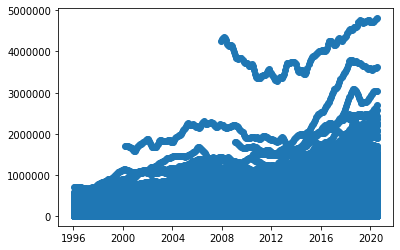

In [11]:
plt.scatter(X11,y11)

In [12]:
# Prediction 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X22, y22, random_state=42)

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)
model
X_test

array([[1.2069216e+09],
       [1.2858048e+09],
       [1.1307168e+09],
       ...,
       [1.1071296e+09],
       [1.5303168e+09],
       [1.2174624e+09]])

In [14]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data
from sklearn.metrics import mean_squared_error, r2_score
### BEGIN SOLUTION
# Use our model to make predictions
predicted = model.predict(X_test)
# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")
# ### END SOLUTION

Mean Squared Error (MSE): 17749300480.68598
R-squared (R2 ): 0.011880398052118823


In [15]:
model.predict(np.array([1596662122]).reshape(-1, 1))

array([[173092.21671138]])

In [17]:
##schools_data

schools_data= pd.read_csv('./Resources/number-of-schools.csv')
schools_data.head(10)

,index,objectid,city,state,zip,county
0,0,2002,NEW SMYRNA,FL,32168,VOLUSIA
1,1,2003,WOODWORTH,LA,71485,RAPIDES
2,2,2004,BRUNSWICK,ME,4011,CUMBERLAND
3,3,2005,CARTHAGE,MS,39051,LEAKE
4,4,2006,KEARNEY,MO,64060,CLAY
5,5,2007,LINCOLN,NE,68516,LANCASTER
6,6,2008,LAS VEGAS,NV,89121,CLARK
7,7,2009,LAS VEGAS,NV,89141,CLARK
8,8,2010,ATLANTIC CITY,NJ,8401,ATLANTIC
9,9,2011,WESTFIELD,NJ,7090,UNION


In [18]:
nc_schols=schools_data[schools_data['state']=='NC']

In [19]:
nc_schols_df=nc_schols.groupby("zip")["objectid"].count().reset_index(name="count")
nc_schols_df

,zip,count
0,27006,2
1,27011,3
2,27012,4
3,27013,2
4,27014,1
...,...,...
620,28806,12
621,28901,3
622,28904,3
623,28905,1


In [20]:
nc_df_1bdr=df_1bdr[df_1bdr['State']=='NC']
nc_df_1bdr.head(10)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,variable,value,type,epoch
718,69197,9434,27052,Zip,NC,NC,Walnut Cove,Winston-Salem,Stokes County,1996-01-31,61014.0,1-bdr,823046400.0
787,69206,1475,27103,Zip,NC,NC,Winston-Salem,Winston-Salem,Forsyth County,1996-01-31,60042.0,1-bdr,823046400.0
807,69209,651,27106,Zip,NC,NC,Winston-Salem,Winston-Salem,Forsyth County,1996-01-31,72332.0,1-bdr,823046400.0
860,69210,1059,27107,Zip,NC,NC,Winston-Salem,Winston-Salem,Forsyth County,1996-01-31,44889.0,1-bdr,823046400.0
878,69221,1660,27127,Zip,NC,NC,Winston-Salem,Winston-Salem,Forsyth County,1996-01-31,54674.0,1-bdr,823046400.0
883,69233,5590,27203,Zip,NC,NC,Asheboro,Greensboro-High Point,Randolph County,1996-01-31,84056.0,1-bdr,823046400.0
891,69235,3033,27205,Zip,NC,NC,Asheboro,Greensboro-High Point,Randolph County,1996-01-31,40790.0,1-bdr,823046400.0
1560,69268,5341,27263,Zip,NC,NC,Archdale,Greensboro-High Point,Randolph County,1996-01-31,62424.0,1-bdr,823046400.0
1561,69270,559,27265,Zip,NC,NC,High Point,Greensboro-High Point,Guilford County,1996-01-31,84129.0,1-bdr,823046400.0
1591,69273,6816,27282,Zip,NC,NC,High Point,Greensboro-High Point,Guilford County,1996-01-31,77471.0,1-bdr,823046400.0


In [21]:
nc_df_1bdr=nc_df_1bdr.groupby(["City","RegionName"])["value"].mean().reset_index(name="avg")
nc_df_1bdr

,City,RegionName,avg
0,Aberdeen,28315,114560.250000
1,Advance,27006,117300.225275
2,Albemarle,28001,35063.496599
3,Alexander,28701,176274.226190
4,Angier,27501,126763.427083
...,...,...,...
462,Wrightsville Beach,28480,274212.242424
463,Youngsville,27596,100356.464865
464,Zebulon,27597,114133.758865
465,Zionville,28698,123630.137725


In [22]:
merge_data=pd.merge(nc_df_1bdr,nc_schols_df,left_on="RegionName",right_on="zip")

In [23]:
merge_data

,City,RegionName,avg,zip,count
0,Aberdeen,28315,114560.250000,28315,4
1,Advance,27006,117300.225275,27006,2
2,Albemarle,28001,35063.496599,28001,8
3,Angier,27501,126763.427083,27501,5
4,Apex,27502,370912.251938,27502,7
...,...,...,...,...,...
401,Winterville,28590,57159.475000,28590,5
402,Wrightsville Beach,28480,274212.242424,28480,1
403,Youngsville,27596,100356.464865,27596,3
404,Zebulon,27597,114133.758865,27597,5


In [70]:
X=merge_data["zip"].values.reshape(-1,1)
y=merge_data["avg"].values.reshape(-1,1)

In [71]:
X=merge_data[["zip"]]
y=merge_data["avg"].values.reshape(-1,1)

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [73]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [74]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.01573071211288868
Testing Score: 0.01671082305273275


Mean Squared Error (MSE): 3880869865.599451
R-squared (R2 ): 0.01671082305273275


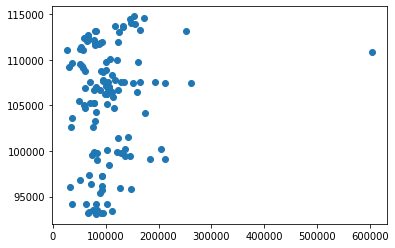

In [75]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data
from sklearn.metrics import mean_squared_error, r2_score
### BEGIN SOLUTION
# Use our model to make predictions
predicted = model.predict(X_test)
# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")
# ### END SOLUTION
plt.scatter(y_test,predicted)

Text(0.5, 1.0, 'Residual Plot')

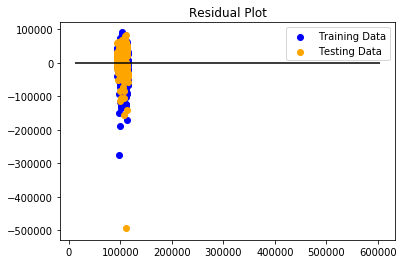

In [76]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [77]:
##income_data

income_data = pd.read_csv('./Resources/rw_census_data.csv')
income_data.head(10)

,population,poverty_count,median_household_income,zipcode,poverty_rate
0,17242.0,10772.0,13092.0,601,62.475351
1,38442.0,19611.0,16358.0,602,51.014515
2,48814.0,24337.0,16603.0,603,49.856599
3,6437.0,4163.0,12832.0,606,64.672984
4,27073.0,11724.0,19309.0,610,43.305138
5,60303.0,28547.0,18171.0,612,47.339270
6,10765.0,5388.0,16018.0,616,50.051092
7,23974.0,11879.0,16735.0,617,49.549512
8,6578.0,3309.0,15206.0,622,50.304044
9,42427.0,22617.0,16280.0,623,53.308035


In [78]:
merge_data2=pd.merge(merge_data,income_data,left_on="RegionName",right_on="zipcode")

merge_data2

,City,RegionName,avg,zip,count,population,poverty_count,median_household_income,zipcode,poverty_rate
0,Aberdeen,28315,99995.515789,28315,4,13700.0,2826.0,51725.0,28315,20.627737
1,Advance,27006,132251.410811,27006,2,14555.0,932.0,78095.0,27006,6.403298
2,Albemarle,28001,58202.006803,28001,8,26601.0,5208.0,45121.0,28001,19.578211
3,Angier,27501,101196.766667,27501,5,21299.0,2601.0,56338.0,27501,12.211841
4,Apex,27502,155699.619863,27502,7,40280.0,2248.0,110513.0,27502,5.580933
...,...,...,...,...,...,...,...,...,...,...
491,Wrightsville Beach,28480,603578.373626,28480,1,2536.0,216.0,83417.0,28480,8.517350
492,Yadkinville,27055,86084.994565,27055,4,14131.0,1855.0,44574.0,27055,13.127167
493,Youngsville,27596,139581.902703,27596,3,18359.0,1624.0,70535.0,27596,8.845798
494,Zebulon,27597,103068.200692,27597,5,23538.0,2995.0,58514.0,27597,12.724106


In [79]:
X=merge_data2[["population","median_household_income"]]
y=merge_data2["avg"].values.reshape(-1,1)

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [81]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.05784215600792042
Testing Score: -0.007537017650764311


In [82]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data
from sklearn.metrics import mean_squared_error, r2_score
### BEGIN SOLUTION
# Use our model to make predictions
predicted = model.predict(X_test)
# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")
# ### END SOLUTION

Mean Squared Error (MSE): 3544637342.24509
R-squared (R2 ): -0.0075370176507643105


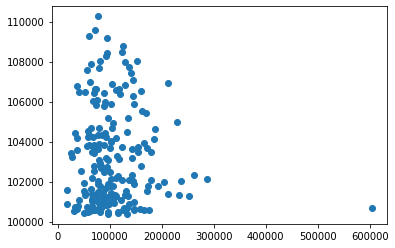

In [83]:
plt.scatter(y_test,predicted)

In [84]:
y_test

array([[ 76419.54081633],
       [152113.86054422],
       [136000.54077253],
       [ 30385.63333333],
       [ 79387.90707965],
       [ 79095.58759124],
       [ 90987.02040816],
       [133210.2761194 ],
       [ 88728.53401361],
       [107964.64071856],
       [ 58470.31441048],
       [ 88553.76691729],
       [116185.04761905],
       [106915.57823129],
       [ 92851.33333333],
       [ 74149.76630435],
       [101413.15816327],
       [102069.07326007],
       [146995.0982906 ],
       [ 81011.93197279],
       [ 72866.40816327],
       [ 92864.93478261],
       [ 82650.52941176],
       [211772.04421769],
       [ 77218.04887218],
       [ 70106.23684211],
       [ 51373.50853242],
       [100729.65298507],
       [165192.5       ],
       [212048.07553957],
       [ 35956.24489796],
       [ 70714.77891156],
       [ 49692.2244898 ],
       [ 58202.00680272],
       [ 84215.74489796],
       [134058.90816327],
       [154883.61734694],
       [ 65794.31985294],
       [1127

In [85]:
predicted

array([[101879.18986983],
       [108038.15197183],
       [100887.93715024],
       [100523.3725031 ],
       [107687.63630195],
       [100939.4580689 ],
       [105981.65681653],
       [104493.82889524],
       [106451.3814728 ],
       [100910.09818456],
       [100480.73890373],
       [100815.14055484],
       [100481.3510653 ],
       [104921.14523999],
       [100875.38914325],
       [103696.56832753],
       [101143.78331402],
       [103957.19216925],
       [101001.10560089],
       [108008.06858597],
       [106621.93644628],
       [103186.65013379],
       [100674.74350575],
       [101367.88428474],
       [100630.91745039],
       [102529.50519452],
       [106459.99279196],
       [101778.2809698 ],
       [103912.4771377 ],
       [106917.20882363],
       [103561.26501821],
       [106631.22871147],
       [101533.55258124],
       [104540.49586574],
       [104344.63593781],
       [105201.23126074],
       [103721.29429083],
       [103488.0383389 ],
       [1012